## Import required libraries

In [38]:
import umap
import matplotlib.pyplot as plt
import numpy as np

## Define functions to plot and load embeddings

In [39]:
CIFAR_LABELS = ['airplane'										
,'automobile'										
,'bird'										
,'cat'										
,'deer'										
,'dog'										
,'frog'										
,'horse'										
,'ship'										
,'truck']

In [40]:
def visualize(feats, labels, name):
    plt.figure(figsize=(10, 6))
    for i in range(10):
        mask = labels == i
        plt.scatter(embedding[mask][:, 0], embedding[mask][:, 1], label=CIFAR_LABELS[i], s=2)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'{name}.png')

In [41]:
def load_and_embed(dir_name):
    feats = np.load(f'../{dir_name}/cifar_mnist_cifar_test_feats.npy')
    labels = np.load(f'../{dir_name}/cifar_mnist_cifar_test_labels.npy')
    indices = np.arange(len(feats))
    np.random.shuffle(indices)
    indices = indices[:2000]
    feats, labels = feats[indices], labels[indices]
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(feats)
    return embedding, labels

## Visualize Baseline BiGAN embeddings

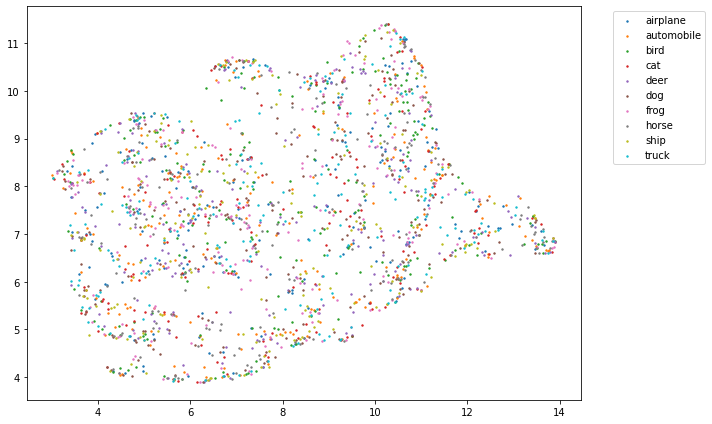

In [42]:
visualize(*load_and_embed('feats'), 'baseline')

## Visalize Negative BigAN embeddings

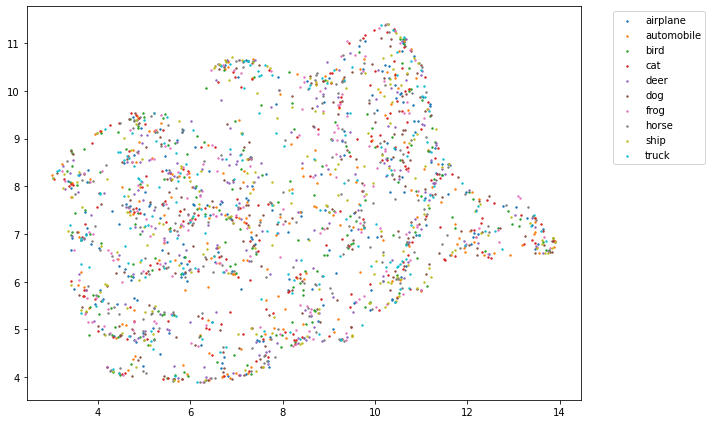

In [44]:
visualize(*load_and_embed('feats_neg_0.75'), 'negative')